# 1、数据读取与探索

In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore")

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 100)

### 1.1 数据读取

In [570]:
def read_dataset(root_path, dataset = 'train'):
    '''
    function:读取训练数据与测试数据
    :param dataset:默认参数,数据集的选择，默认读取测试集
    :param root_path:固定参数,数据集所在统一路径
    :return:返回训练或者测试数据集
    '''
    if dataset == 'train':
        X_train = pd.read_csv(root_path+'train/feature.csv')
        y_train = pd.read_csv(root_path+'train/label.csv')
        
        return X_train, y_train
    elif dataset == 'test':
        X_test = pd.read_csv(root_path+'test/feature.csv')
        y_test = pd.read_csv(root_path+'test/label.csv')
        
        return X_test, y_test
    else:
        print('dataset value error')

root_path = 'data/'
X_train, y_train = read_dataset(root_path, dataset='train')
X_test, y_test = read_dataset(root_path, dataset='test')

In [571]:
X_train.head()

,APPLICATION_ID,v000,v001,v002,v003,v004,v005,v006,v007,v008,...,v990,v991,v992,v993,v994,v995,v996,v997,v998,v999
0,44c4e0d49d5bf94efa446e03ecf84ba5,NaN,NaN,NaN,5.528423,NaN,NaN,10.0,0.0,0.016305,...,2.0,0.000000,NaN,NaN,NaN,NaN,41.0,0.0,NaN,0.0
1,993ee0eed4ad96f4f5d6dc30d56bdf94,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,8.0,0.0,NaN,0.0
2,a9815449c0a385ee0d53305b8cca95c6,NaN,NaN,NaN,5.062508,0.00000,NaN,7.0,0.0,1.039721,...,0.0,0.166667,NaN,NaN,NaN,NaN,22.0,0.0,NaN,0.0
3,4f9dd0d609cee4360e110d56cc35afd9,0.0,NaN,NaN,2.575101,0.44461,NaN,NaN,NaN,0.980110,...,NaN,0.250000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
4,904de5e19a5ea36e8f4b9f4cf5bdd953,0.0,NaN,0.000473,5.528423,0.00000,NaN,1.0,0.0,0.950612,...,12.0,NaN,NaN,0.079084,0.415888,NaN,76.0,0.0,3.894232,0.0


In [572]:
# Scaler
import copy
from sklearn.preprocessing import StandardScaler, MinMaxScaler


std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

def scaler(df_train, df_test, tag='minmax'):
    
    df_train_copy = copy.deepcopy(df_train)
    df_test_copy = copy.deepcopy(df_test)
    
    if tag == 'std':
        for column in df_train_copy.columns[1:]:
            df_train_copy['scaler_{}'.format(column)] = std_scaler.fit_transform(df_train_copy[column].values.reshape(-1,1))
            df_test_copy['scaler_{}'.format(column)] = std_scaler.transform(df_test_copy[column].values.reshape(-1,1))
    elif tag == 'minmax':
        for column in df_train.columns[1:]:
            df_train_copy['scaler_{}'.format(column)] = minmax_scaler.fit_transform(df_train_copy[column].values.reshape(-1,1))
            df_test_copy['scaler_{}'.format(column)] = minmax_scaler.transform(df_test_copy[column].values.reshape(-1,1))
    
    drop_colums = X_train.columns[1:]
    df_train_copy.drop(drop_colums, axis=1, inplace=True)
    df_test_copy.drop(drop_colums, axis=1, inplace=True)
    
    return df_train_copy, df_test_copy


In [573]:
X_train_scaler, X_test_scaler = scaler(X_train, X_test)

### 1.2 数据探查

In [698]:
class DataDescribe:
    '''
    数据探查类，可以查看数据中的不存在缺失的特征、计数统计等情况
    
    Attributes:
        X_train : 训练集基本信息表.
        X_test  : 测试集基本信息表.
        y_train : 训练集的标签.
        y_test  : 测试集的标签.
    
    '''
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        
    def get_data_describe(self):
        """
        数据描述
        """
        print(self.X_train.describe())
        
    def get_null_info(self):
        '''
        查看数据集的缺失信息
        '''
        print('不存在缺失的特征：')
        print(self.X_train.columns[self.X_train.isnull().any()==False])
        print()
    
    def get_null_ratio(self):
        """
        查看特征缺失比例
        """
        print('特征缺失比例：')
        print(self.X_train.isnull().sum() / self.X_train.shape[0])
        print()
        
    def get_label_distribution(self):
        
        """
        标签分布
        """
        print('Train:')
        print('Normal', round(self.y_train["DEFAULT_LABEL"].value_counts()[0]/len(self.y_train) * 100,2), '% of the dataset')
        print('Default', round(self.y_train["DEFAULT_LABEL"].value_counts()[1]/len(self.y_train) * 100,2), '% of the dataset')
               
        plt.figure(figsize=(14,5)) 
        ax1 = plt.subplot(121)
        colors = ["#04d9ff", "#069af3"]

        sns.countplot('DEFAULT_LABEL', data=self.y_train, palette=colors)
        plt.title('Train label Distributions \n (0: Normal || 1: Default)', fontsize=14)
    
    
    def get_amount_conut(self):
        
        merge_train_data = pd.merge(self.X_train, self.y_train, on='APPLICATION_ID')
        class_0 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 0]
        class_1 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 1]

        class_0_col = class_0[~pd.isna(class_0[column])][column].value_counts(bins=20)
        class_1_col = class_1[~pd.isna(class_1[column])][column].value_counts(bins=20)
     

    def get_class_scaler_data(self):
        
        select_index = ['scaler_v183','scaler_v086','scaler_v428','scaler_v883','scaler_v906','scaler_v682','scaler_v282','scaler_v647','scaler_v034','DEFAULT_LABEL']
        merge_train_data = pd.merge(self.X_train, self.y_train, on='APPLICATION_ID')
        merge_train_data = merge_train_data[select_index]
        
        class_0 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 0]
        class_1 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 1]
        
        for i in select_index[:5]:
            class_0[i] = class_0[i] - 0.02
            class_1[i] = class_1[i] + 0.01
        for i in select_index[5:-1]:
            class_1[i] = class_1[i] - 0.02
            class_0[i] = class_0[i] + 0.01
        for i in ['scaler_v034', 'scaler_v647']:
            class_1[i] = class_1[i] + 0.02
            class_0[i] = class_0[i] + 0.02
        for i in ['scaler_v282']:
            class_1[i] = class_1[i] + 0.02
        for i in ['scaler_v428']:
            class_0[i] = class_0[i] + 0.02
        for i in ['scaler_v883']:
            class_0[i] = class_0[i] + 0.01
        
        
        return class_0, class_1
        
    def get_feature_distribution(self, tag, column):
        
        plt.figure(figsize=(15,10)) 

        if tag == 'train':
            col = self.X_train[~pd.isna(self.X_train[column])][column].values
            
            merge_train_data = pd.merge(self.X_train, self.y_train, on='APPLICATION_ID')
            class_0 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 0]
            class_1 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 1]
            
            class_0_col = class_0[~pd.isna(class_0[column])][column].values
            class_1_col = class_1[~pd.isna(class_1[column])][column].values
            
            
        elif tag == 'test':
            col = self.X_test[column].values
        
        ax1 = plt.subplot(311)
        sns.distplot(col, color='r')
        plt.title('Distribution of {} over all data'.format(column), fontsize=14)
        plt.xlim([min(col), max(col)])
        
        ax1 = plt.subplot(312)
        sns.distplot(class_1_col, color='r', hist=False)
        plt.title('Distribution of {} in class 1'.format(column), fontsize=14)
        plt.xlim([min(class_1_col), max(class_0_col)])
        
#         ax1 = plt.subplot(313)
        sns.distplot(class_0_col, color='b', hist=False)
        plt.title('Distribution of {} in class 0'.format(column), fontsize=14)
        plt.xlim([min(class_0_col), max(class_0_col)])

        plt.show()

    def plot_time_amount(self, tag):
        
        plt.figure(figsize=(20,5))
        if tag == 'train':
            
            groupbyed = self.y_train.groupby('APPLICATION_DATE').sum().reset_index()
            
            plt.plot(groupbyed.APPLICATION_DATE, groupbyed.DEFAULT_LABEL)
            plt.xticks(range(1,len(groupbyed.APPLICATION_DATE),4),rotation=45)
            
        if tag == 'test':
            
            groupbyed = self.y_test.groupby('APPLICATION_DATE').sum().reset_index()
            
            plt.plot(groupbyed.APPLICATION_DATE, groupbyed.DEFAULT_LABEL)
            plt.xticks(range(1,len(groupbyed.APPLICATION_DATE),4),rotation=45)
            
    def null_ratio_on_diff_fea(self, tag):
        
        plt.figure(figsize=(20,10))
        if tag == 'train':
            merge_train_data = pd.merge(self.X_train, self.y_train, on='APPLICATION_ID')
            class_0 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 0]
            class_1 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 1]
            
            ratio_all = merge_train_data.isnull().sum() / merge_train_data.shape[0]
            ratio_0 = class_0.isnull().sum() / class_0.shape[0]
            ratio_1 = class_1.isnull().sum() / class_1.shape[0]
            
            
            index = list(range(116, 121))
            ax1 = plt.subplot(411)
            plt.bar(np.arange(len(index)), ratio_0.values[index])
            ax2 = plt.subplot(412)
            plt.bar(np.arange(len(index)), ratio_1.values[index])
            ax3 = plt.subplot(413)
            plt.bar(np.arange(len(index)), ratio_1.values[index] - ratio_0.values[index])
            ax4 = plt.subplot(414)
            plt.bar(np.arange(len(index)), ratio_all.values[index])
            dic_temp = {}
            dic_temp['v_name'] = [i[-4:] for i in list(ratio_all.index.values)]
            dic_temp['all'] = ratio_all.values
            dic_temp['class_1'] = ratio_1.values
            dic_temp['class_0'] = ratio_0.values
            dic_temp['minus'] = ratio_1.values - ratio_0.values
            return_df = pd.DataFrame(dic_temp)
            
            return return_df
        
        if tag == 'test':
            merge_test_data = pd.merge(self.X_test, self.y_test, on='APPLICATION_ID')
            class_0 = merge_test_data[merge_test_data['DEFAULT_LABEL'] == 0]
            class_1 = merge_test_data[merge_test_data['DEFAULT_LABEL'] == 1]
            ratio_0 = class_0.isnull().sum() / class_0.shape[0]
            ratio_1 = class_1.isnull().sum() / class_1.shape[0]
            ax1 = plt.subplot(311)
            plt.bar(np.arange(len(ratio_0)), ratio_0.values)
            ax2 = plt.subplot(312)
            plt.bar(np.arange(len(ratio_1)), ratio_1.values)
            ax3 = plt.subplot(313)
            plt.bar(np.arange(len(ratio_1)), ratio_1.values - ratio_0.values)
    
            
    def get_feat_count(self):
        
        merge_train_data = pd.merge(self.X_train, self.y_train, on='APPLICATION_ID')
        class_0 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 0]
        class_1 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 1]
        
        for col in class_0.columns:
            print(class_0[col].value_counts()/class_0.shape[0])
            print()
        
        for col in class_1.columns:
            print(class_1[col].value_counts()/class_1.shape[0])
            print()
    
    def get_sample_null_ratio(self):
        
        colors = ["#0101DF", "#DF0101"]
        merge_train_data = pd.merge(self.X_train, self.y_train, on='APPLICATION_ID')
        class_0 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 0]
        class_1 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 1]
        null_ration_0 = class_0.isnull().sum(axis=1)/1000
        null_ration_1 = class_1.isnull().sum(axis=1)/1000
        
        print("Normal: {}".format(null_ration_0.mean()))
        print('Default {}'.format(null_ration_1.mean()))
        
        
        
        df = merge_train_data.sample(frac=1, random_state=42)
        
        fraud_df = df.loc[df['DEFAULT_LABEL'] == 1]
        non_fraud_df = df.loc[df['DEFAULT_LABEL'] == 0][:len(fraud_df)]

        normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

        new_df = normal_distributed_df.sample(frac=1, random_state=42)
        
        new_df['ration'] = new_df.isnull().sum(axis=1)/1000
        
        print(np.corrcoef(new_df['ration'].values, new_df['DEFAULT_LABEL'].values))
        sns.boxplot(x="DEFAULT_LABEL", y="ration", data=new_df, palette=colors)
        
    def feature_boxplot(self):
        
        
        colors = ["#0101DF", "#DF0101"]
        f, axes = plt.subplots(ncols=4, figsize=(20,4))
        
        merge_train_data = pd.merge(self.X_train, self.y_train, on='APPLICATION_ID')
        
        df = merge_train_data.sample(frac=1, random_state=13)
        
        fraud_df = df.loc[df['DEFAULT_LABEL'] == 1]
        non_fraud_df = df.loc[df['DEFAULT_LABEL'] == 0][:len(fraud_df)]

        normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

        new_df = normal_distributed_df.sample(frac=1, random_state=13)

        sns.boxplot(x="DEFAULT_LABEL", y="scaler_v086", data=new_df, palette=colors, ax=axes[0])
        axes[0].set_title('V17 vs Class')

        sns.boxplot(x="DEFAULT_LABEL", y="scaler_v067", data=new_df, palette=colors, ax=axes[1])
        axes[1].set_title('V14 vs Class')


        sns.boxplot(x="DEFAULT_LABEL", y="scaler_v647", data=new_df, palette=colors, ax=axes[2])
        axes[2].set_title('V12 vs Class')


        sns.boxplot(x="DEFAULT_LABEL", y="scaler_v034", data=new_df, palette=colors, ax=axes[3])
        axes[3].set_title('V10 vs Class')

        plt.show()
        
        
    def data_corr(self):
        
        random.seed(42)
#         columns = random.sample(list(X_train.columns[1:].values),50) + ['APPLICATION_ID']
        columns = list(self.X_train.columns.values)[901:1000] + ['APPLICATION_ID']
        merge_train_data = pd.merge(self.X_train[columns], self.y_train, on='APPLICATION_ID')
        
        df = merge_train_data.sample(frac=1, random_state=42)
        
        fraud_df = df.loc[df['DEFAULT_LABEL'] == 1]
        non_fraud_df = df.loc[df['DEFAULT_LABEL'] == 0][:len(fraud_df)]

        normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

        new_df = normal_distributed_df.sample(frac=1, random_state=42)
        
        f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

        corr = merge_train_data.corr()
        sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
        ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


        sub_sample_corr = new_df.corr()
        sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
        ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
        plt.show()
        
        return corr, sub_sample_corr
    
    def get_mean_var(self):
        
        merge_train_data = pd.merge(self.X_train, self.y_train, on='APPLICATION_ID')
        class_0 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 0]
        class_1 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 1]
        
        class_0_mean_sort = class_0.describe().loc[['mean', 'std']].sort_values(by=['mean'], ascending=False, axis = 1)
        class_0_std_sort = class_0.describe().loc[['mean', 'std']].sort_values(by=['std'], ascending=False, axis = 1)
        
        class_1_mean_sort = class_1.describe().loc[['mean', 'std']].sort_values(by=['mean'], ascending=False, axis = 1)
        class_1_std_sort = class_1.describe().loc[['mean', 'std']].sort_values(by=['std'], ascending=False, axis = 1)
        
        return class_0_mean_sort, class_0_std_sort, class_1_mean_sort, class_1_std_sort

    
    def reduction_clustering(self):
        
        
        merge_train_data = pd.merge(self.X_train, self.y_train, on='APPLICATION_ID')
        
        df = merge_train_data.sample(frac=1, random_state=42)
        
        fraud_df = df.loc[df['DEFAULT_LABEL'] == 1]
        non_fraud_df = df.loc[df['DEFAULT_LABEL'] == 0][:len(fraud_df)]

        normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

        new_df = normal_distributed_df.sample(frac=1, random_state=42)
        
        X = new_df.drop(['DEFAULT_LABEL', 'APPLICATION_ID','APPLICATION_DATE'], axis=1)
        X = X.fillna(0)
        y = new_df['DEFAULT_LABEL']


        # T-SNE Implementation
        X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
        
        X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
        
        
        f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
        # labels = ['No Fraud', 'Fraud']
        f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


        blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
        red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


        # t-SNE scatter plot
        ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
        ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
        ax1.set_title('t-SNE', fontsize=14)

        ax1.grid(True)

        ax1.legend(handles=[blue_patch, red_patch])
        
        # PCA scatter plot
        ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
        ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
        ax2.set_title('PCA', fontsize=14)

        ax2.grid(True)

        ax2.legend(handles=[blue_patch, red_patch])


In [616]:
a[[ 31, 166, 862, 161, 814, 491,  67, 909, 920, 118]]

array([0.0975245, 0.0975245, 0.0975245, 0.0975245, 0.0975245, 0.0975245,
       0.0975245, 0.0975245, 0.0975245, 0.0975245])

In [614]:
np.argsort(a)[-10:]

array([ 31, 166, 862, 161, 814, 491,  67, 909, 920, 118])

In [647]:
with open("dis_data//feature_importances_.pkl", 'rb') as fi:
    feaimp = pickle.load(fi)

In [648]:
feaimp

array([0.00073217, 0.00018424, 0.00045261, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [699]:
DataDesc = DataDescribe(X_train_scaler, X_test_scaler, y_train, y_test)

In [567]:
DataDesc = DataDescribe(X_train, X_test, y_train, y_test)

In [646]:
a.to_csv('dis_data/feature_null_ratio.csv')

In [700]:
class_0, class_1 = DataDesc.get_class_scaler_data()

In [713]:
class_0.reset_index(drop=True)

,scaler_v183,scaler_v086,scaler_v428,scaler_v883,scaler_v906,scaler_v682,scaler_v282,scaler_v647,scaler_v034,DEFAULT_LABEL
0,0.552612,0.654187,0.397207,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0.533369,0.798500,0.363676,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,0.725629,NaN,0.409533,NaN,NaN,NaN,NaN,NaN,0
3,NaN,0.523738,NaN,0.325984,NaN,NaN,NaN,NaN,NaN,0
4,0.349702,0.748078,0.269213,0.320537,NaN,NaN,NaN,0.079814,0.125762,0
...,...,...,...,...,...,...,...,...,...,...
71952,NaN,0.745223,NaN,0.262424,NaN,NaN,NaN,NaN,NaN,0
71953,0.436708,0.794521,0.647368,NaN,NaN,NaN,NaN,NaN,NaN,0
71954,NaN,NaN,NaN,0.509577,NaN,NaN,NaN,NaN,NaN,0
71955,0.349414,0.489390,0.584971,NaN,NaN,NaN,NaN,0.056471,0.030000,0


In [718]:
merge_data.drop(['DEFAULT_LABEL_x', 'DEFAULT_LABEL_y'],axis= 1, inplace=True)
merge_data.head()

,scaler_v183_x,scaler_v086_x,scaler_v428_x,scaler_v883_x,scaler_v906_x,scaler_v682_x,scaler_v282_x,scaler_v647_x,scaler_v034_x,scaler_v183_y,scaler_v086_y,scaler_v428_y,scaler_v883_y,scaler_v906_y,scaler_v682_y,scaler_v282_y,scaler_v647_y,scaler_v034_y
0,0.552612,0.654187,0.397207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.841779,NaN,0.494130,NaN,NaN,NaN,NaN,NaN
1,0.533369,0.798500,0.363676,NaN,NaN,NaN,NaN,NaN,NaN,0.584475,0.494331,0.333475,0.586787,NaN,NaN,NaN,NaN,NaN
2,NaN,0.725629,NaN,0.409533,NaN,NaN,NaN,NaN,NaN,0.467873,0.867222,0.294203,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.523738,NaN,0.325984,NaN,NaN,NaN,NaN,NaN,NaN,0.715483,NaN,0.643864,NaN,NaN,NaN,NaN,NaN
4,0.349702,0.748078,0.269213,0.320537,NaN,NaN,NaN,0.079814,0.125762,0.494275,0.737857,0.346208,0.402916,NaN,NaN,NaN,NaN,NaN


In [721]:
sort_index = []
for i in range(9):
    index = merge_data.columns.values
    sort_index.append(index[i])
    sort_index.append(index[i + 9])
sort_index

['scaler_v183_x',
 'scaler_v183_y',
 'scaler_v086_x',
 'scaler_v086_y',
 'scaler_v428_x',
 'scaler_v428_y',
 'scaler_v883_x',
 'scaler_v883_y',
 'scaler_v906_x',
 'scaler_v906_y',
 'scaler_v682_x',
 'scaler_v682_y',
 'scaler_v282_x',
 'scaler_v282_y',
 'scaler_v647_x',
 'scaler_v647_y',
 'scaler_v034_x',
 'scaler_v034_y']

In [722]:
def merge_data(class_0, class_1):
    
    merge_data = pd.merge(class_0.reset_index(drop=True).iloc[:len(class_1)], class_1.reset_index(drop=True), right_index=True, left_index=True)
    
    merge_data.drop(['DEFAULT_LABEL_x', 'DEFAULT_LABEL_y'], axis=1, inplace=True)
    sort_index = []
    for i in range(9):
        index = merge_data.columns.values
        sort_index.append(index[i])
        sort_index.append(index[i + 9])
    return merge_data[sort_index]
    

In [724]:
a = merge_data(class_0, class_1)

In [725]:
a.to_csv('dis_data/merge_data_a.csv')

In [702]:
class_0.to_csv('dis_data/class_0.csv')
class_1.to_csv('dis_data/class_1.csv')

## The original dataframe was heavily imbalanced!

Train:
Normal 97.9 % of the dataset
Default 2.1 % of the dataset


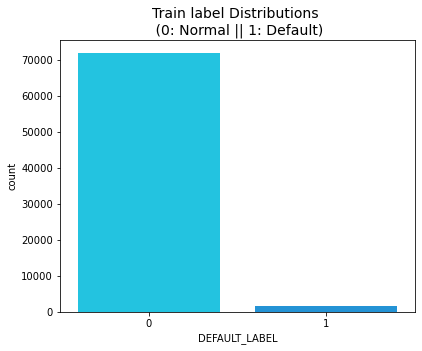

In [23]:
DataDesc.get_label_distribution()

In [94]:
# 查看不同类别下，特征的分布
class_0_mean_sort, class_0_std_sort, class_1_mean_sort, class_1_std_sort = DataDesc.get_mean_var()

In [95]:
a = pd.merge(class_0_mean_sort.T, class_1_mean_sort.T, left_index=True, right_index=True)

In [96]:
a['mean_gap'] = a['mean_x'] - a['mean_y']

In [97]:
a['std_gap'] = a['std_x'] - a['std_y']

In [98]:
a.sort_values(by=['mean_gap'], ascending=False)

,mean_x,std_x,mean_y,std_y,mean_gap,std_gap
scaler_v282,0.277358,0.284614,0.162968,0.216016,0.114390,0.068598
scaler_v604,0.283499,0.304410,0.197171,0.258481,0.086327,0.045928
scaler_v460,0.311414,0.317366,0.237322,0.307045,0.074092,0.010321
scaler_v587,0.221082,0.245322,0.150849,0.199913,0.070233,0.045409
scaler_v903,0.521266,0.345090,0.457311,0.344772,0.063955,0.000318
...,...,...,...,...,...,...
scaler_v107,0.214546,0.252689,0.270798,0.289541,-0.056252,-0.036852
scaler_v943,0.317926,0.265604,0.376468,0.286178,-0.058543,-0.020574
scaler_v183,0.517899,0.149165,0.578208,0.142301,-0.060310,0.006864
scaler_v126,0.277318,0.314255,0.344048,0.343632,-0.066730,-0.029377


In [26]:
class_1_mean_sort

,DEFAULT_LABEL,scaler_v886,scaler_v751,scaler_v482,scaler_v033,scaler_v648,scaler_v127,scaler_v162,scaler_v163,scaler_v319,...,scaler_v916,scaler_v930,scaler_v136,scaler_v238,scaler_v063,scaler_v304,scaler_v005,scaler_v424,scaler_v669,scaler_v729
mean,1.0,0.985530,0.964381,0.956077,0.954839,0.953234,0.936857,0.914073,0.905109,0.899565,...,0.000146,0.000100,0.000054,0.000050,0.000019,0.0,0.0,0.0,0.0,0.0
std,0.0,0.003054,0.005962,0.143931,0.153708,0.145353,0.007971,0.001918,0.012694,0.008452,...,0.002163,0.001925,0.000782,0.000828,0.000391,0.0,0.0,0.0,0.0,0.0


In [26]:
a = X_train_scaler['scaler_v121'].values

In [27]:
a[~np.isnan(a)]

array([0.44245142, 0.54739838, 0.63303428, ..., 0.29808056, 0.39940475,
       0.34827268])

# 处理特征分布

In [424]:
from sklearn.neighbors import KernelDensity


def get_feature_dis_data(X_train, y_train, column):

    merge_train_data = pd.merge(X_train, y_train, on='APPLICATION_ID')
    class_0 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 0]
    class_1 = merge_train_data[merge_train_data['DEFAULT_LABEL'] == 1]    

    class_0_col = class_0[~pd.isna(class_0[column])][column].values
    class_1_col = class_1[~pd.isna(class_1[column])][column].values
    
    
    ked_0 = KernelDensity(kernel='gaussian', bandwidth=0.01)
    ked_0.fit(class_0_col.reshape(-1, 1))
    x_temp = np.linspace(0, 1, 100)
    dis_data_0 = ked_0.score_samples(x_temp.reshape(-1, 1))
    
    ked_1 = KernelDensity(kernel='gaussian', bandwidth=0.028)
    ked_1.fit(class_1_col.reshape(-1, 1))
    x_temp = np.linspace(0, 1, 100)
    dis_data_1 = ked_1.score_samples(x_temp.reshape(-1, 1))
    
    plt.figure(figsize=(15,3))
    plt.plot(x_temp, np.exp(dis_data_0))
    plt.plot(x_temp, np.exp(dis_data_1))
    plt.xlim([0, 1])
    
    return_data = {}
    return_data['v_name'] = column[-4:]
    return_data['xList'] = list(map(str, list(x_temp)))
    return_data['numList1'] = list(np.exp(dis_data_1))
    return_data['numList2'] = list(np.exp(dis_data_0))
    return return_data

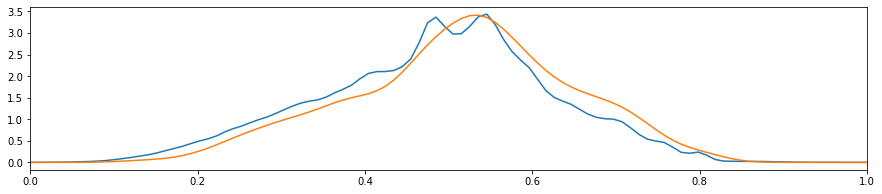

In [425]:
v121_dic = get_feature_dis_data(X_train_scaler, y_train, 'scaler_v121')

In [344]:
dis_data = []

In [345]:
dis_data.append(v929_dic)

In [347]:
dis_data.append(v336_dic)

In [349]:
dis_data.append(v809_dic)

In [352]:
dis_data.append(v141_dic)

In [355]:
dis_data.append(v350_dic)

In [358]:
dis_data.append(v298_dic)

In [415]:
dis_data.append(v087_dic)

In [418]:
dis_data.append(v508_dic)

In [426]:
dis_data.append(v121_dic)

In [427]:
import pickle

with open('dis_data/dis_data.pkl', "wb") as f:
    pickle.dump(dis_data, f)

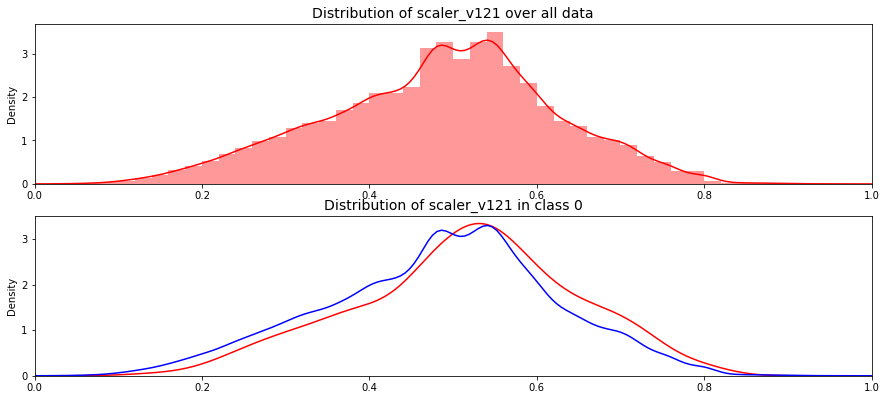

In [419]:
DataDesc.get_feature_distribution('train','scaler_v121')

# 处理缺失统计，随时间变化

In [445]:
def get_null_times(X_train, y_train):
    
    merge_train_data = pd.merge(X_train, y_train, on='APPLICATION_ID')
    merge_train_data['date_month'] = merge_train_data['APPLICATION_DATE'].apply(lambda x:x[:-3])
    groupy = merge_train_data.groupby('date_month')
    result = []
    for data in groupy:
        ratio =  data[1].isnull().sum() / data[1].shape[0]
        result.append(ratio)
    
    return result

In [486]:
ratio_result = get_null_times(X_train, y_train)

In [487]:
ration_df = {}
ration_df['index'] = ratio_result[0].index.values
ration_df['May'] = ratio_result[0].values
ration_df['June'] = ratio_result[1].values
ration_df['July'] = ratio_result[2].values
ration_df['August'] = ratio_result[3].values
ration_df['September'] = ratio_result[4].values

In [488]:
ration_df = pd.DataFrame(ration_df)

In [491]:
np.argsort(ration_df.var(axis=1).values)[-20:]

array([397,  82, 336, 243, 221,  53, 479, 356, 869, 716, 635, 672, 631,
        50, 545, 150, 500, 349, 567,  59])

In [499]:
ration_df.iloc[list(np.argsort(ration_df.var(axis=1).values)[-20:])]

,index,May,June,July,August,September
397,v396,0.517145,0.529432,0.540105,0.551831,0.593560
82,v081,0.517145,0.529432,0.540105,0.551831,0.593560
336,v335,0.517145,0.529432,0.540105,0.551831,0.593560
243,v242,0.517145,0.529432,0.540105,0.551831,0.593560
221,v220,0.536303,0.550006,0.560043,0.575278,0.614531
53,v052,0.790360,0.797829,0.811717,0.835116,0.867000
479,v478,0.787919,0.795809,0.810490,0.834087,0.865783
356,v355,0.787919,0.795809,0.810490,0.834087,0.865783
869,v868,0.787919,0.795809,0.810490,0.834087,0.865783
716,v715,0.787919,0.795809,0.810490,0.834087,0.865783


In [494]:
ration_df.columns.values[1:]

array(['May', 'June', 'July', 'August', 'September'], dtype=object)

In [550]:
return_all = []
for i in ['v396', 'v220', 'v052', 'v630', 'v544']:
    return_list_sample = []
    values = ration_df[ration_df['index'] == i]
    column = list(ration_df.columns.values[1:])
    dict_temp = {}
    for k in column:
        return_dic = {}
        return_dic['name'] = k
        return_dic['value'] = (values[k].values[0] -0.35) * 100
        return_list_sample.append(return_dic)
    dict_temp[i] = return_list_sample
    return_all.append(dict_temp)

In [551]:
return_all[0]

{'v396': [{'name': 'May', 'value': 16.714460036607694},
  {'name': 'June', 'value': 17.943156477468758},
  {'name': 'July', 'value': 19.010531158938704},
  {'name': 'August', 'value': 20.183052241875778},
  {'name': 'September', 'value': 24.355973481260996}]}

In [552]:
with open('dis_data/null_ratio.pkl', "wb") as f:
    pickle.dump(return_all, f)

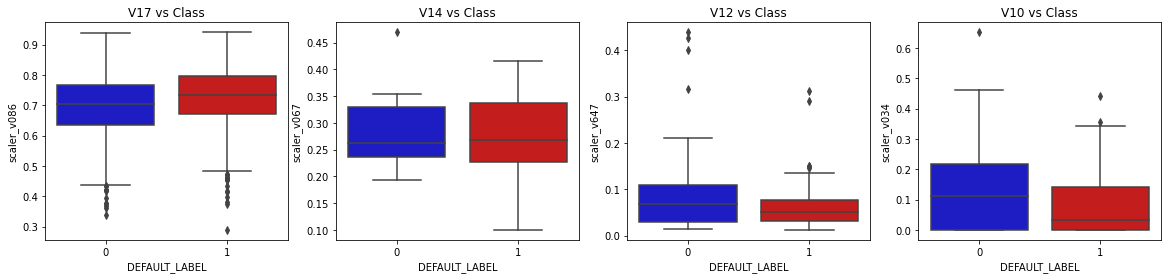

In [641]:
DataDesc.feature_boxplot()

## Why do we create a sub-Sample?
###  The original dataframe was heavily imbalanced! 
### Using the original dataframe will cause the following issues:
### Overfitting: 
###   Our classification model will assume that in most cases it is normal! For our model, what we want is to determine when a default has occurred.
### Wrong Correlations: 
###    Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Normal or  Default) by having an imbalance dataframe we are not able to see the true correlations between the class and features

In [221]:
DataDesc = DataDescribe(X_train, X_test, y_train, y_test)

Normal: 0.4857202495935118
Default 0.5157530784186644
[[1.         0.11475166]
 [0.11475166 1.        ]]


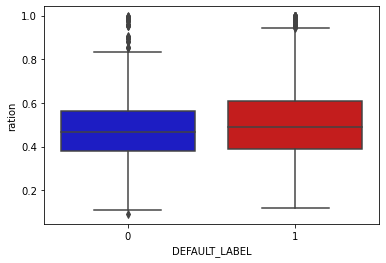

In [172]:
DataDesc.get_sample_null_ratio()

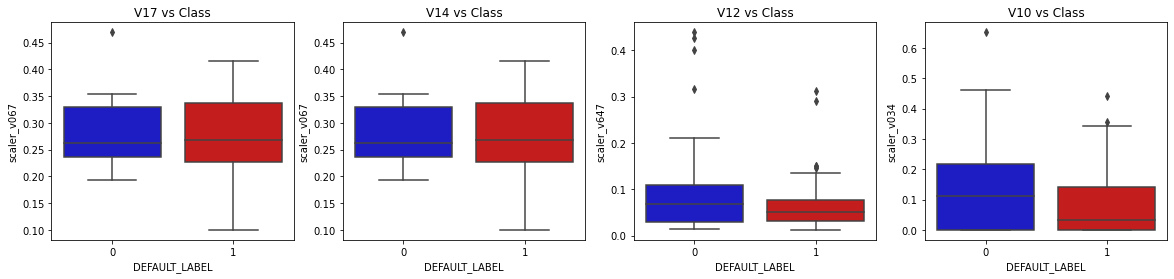

In [390]:
DataDesc.feature_boxplot()

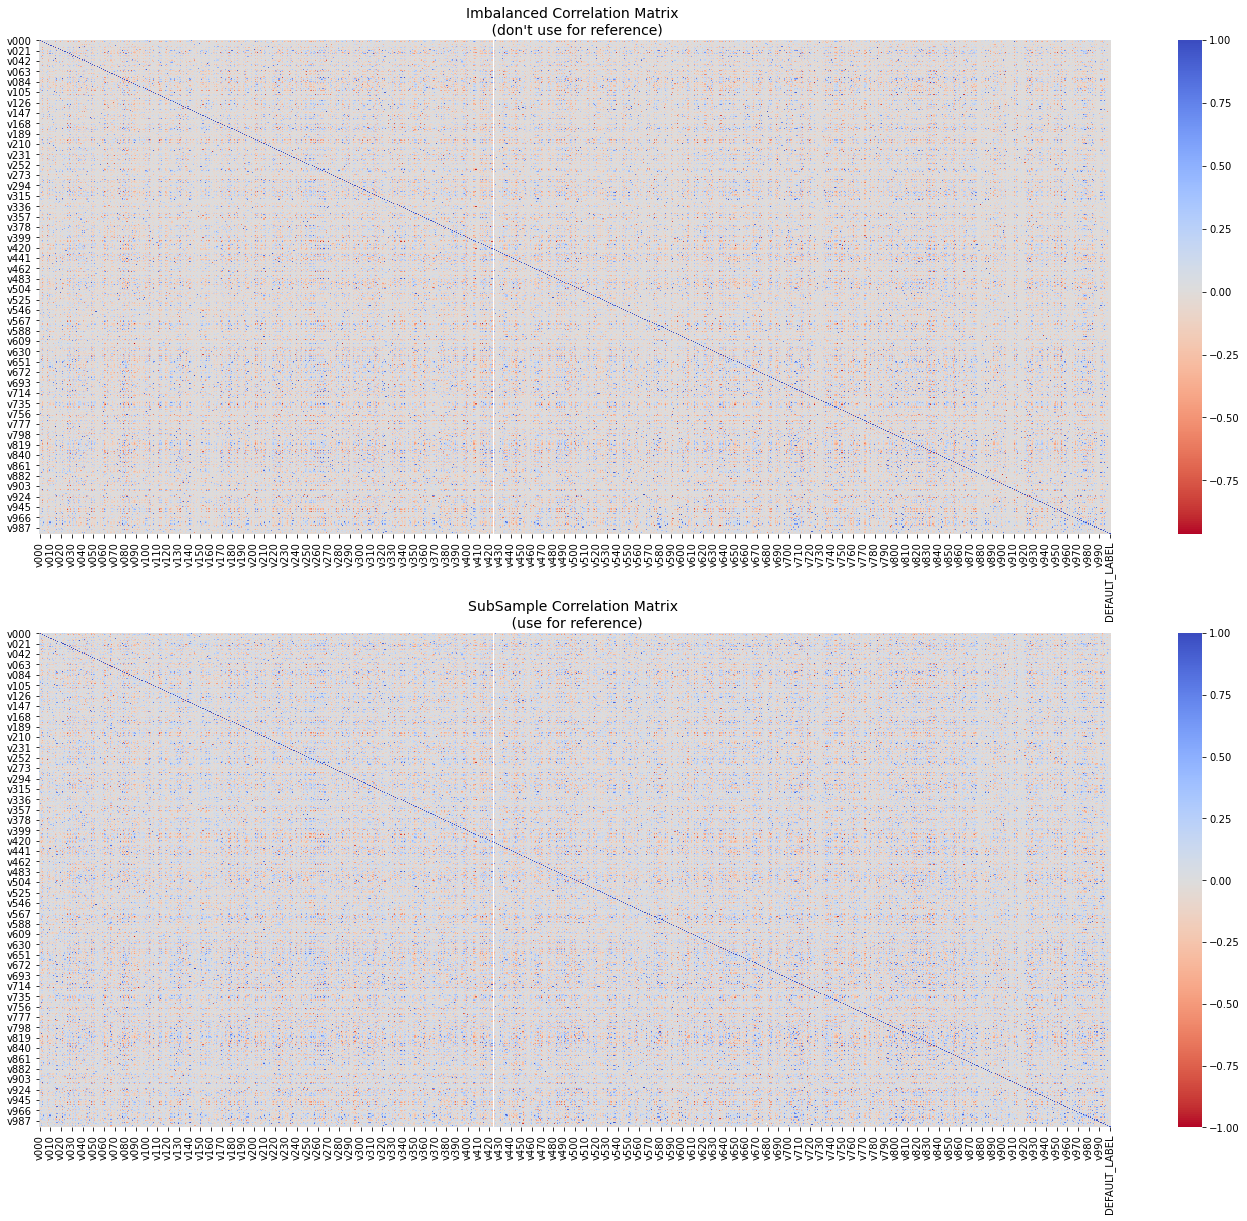

In [7]:
corr, sub_sample_corr = DataDesc.data_corr()

In [307]:
corr.iloc[:,-1]

v000            -0.003638
v001             0.017814
v002            -0.025956
v003             0.002323
v004            -0.005059
                   ...   
v996            -0.010227
v997            -0.003314
v998             0.001986
v999             0.010579
DEFAULT_LABEL    1.000000
Name: DEFAULT_LABEL, Length: 1001, dtype: float64

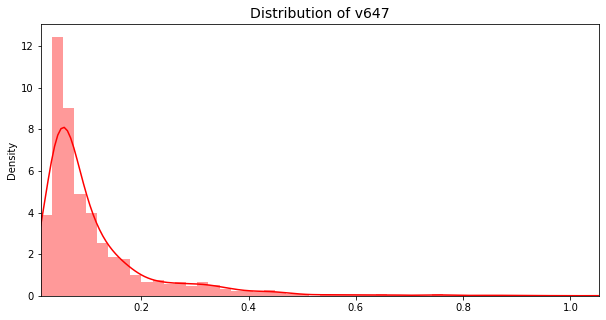

In [117]:
DataDesc.get_feature_distribution('train', 'v647')